In [1]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import numpy as np
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
import pickle

training_file = "traffic-sign-data/train.p"
testing_file = "traffic-sign-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [3]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_train_original = X_train
X_test_original = X_test

# TODO: Implement data normalization here.

X_train_standardised = (X_train - X_train.mean()) / np.std(X_train)
X_test_standardised = (X_test - X_test.mean()) / np.std(X_test)
X_train_normalised = (X_train - X_train.mean()) / (np.max(X_train) - np.min(X_train))
X_test_normalised = (X_test - X_test.mean()) / (np.max(X_test) - np.min(X_test))

print("Min: %d" % np.min(X_train_normalised))
print("Max: %d" % np.max(X_train_normalised))
print("Mean: %d" % np.mean(X_train_normalised))

y_train = np_utils.to_categorical(y_train,num_classes=43)
y_test = np_utils.to_categorical(y_test, num_classes=43)
 

# Normalised input
X_train = X_train_normalised
X_test = X_test_normalised

batch_size = 100
nb_epoch = 100

from sklearn.model_selection import train_test_split

# TODO: Split some of the training data into a validation dataset.
X_train, X_val, y_train, y_val = train_test_split(\
    X_train, y_train, test_size=0.2, random_state=42)

print("X_train: ", len(X_train))
print("y_train: ", len(y_train))
print("X_val: ", len(X_val))
print("y_val: ", len(y_val))


Min: 0
Max: 0
Mean: 0
X_train:  31367
y_train:  31367
X_val:  7842
y_val:  7842


In [4]:
model = Sequential()

model.add(Conv2D(32,
                (7,7),
                 activation="relu",
                 input_shape=(32,32,3)
                ))
# model.add(Dropout(0.2))
model.add(Conv2D(128,
                (5,5),
                 activation="relu"
                ))
# model.add(Dropout(0.3))
model.add(Conv2D(128,
                (3,3),
                 activation="relu"
                ))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
# model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=43,activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4736      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       102528    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              52429824  
_________________________________________________________________
dense_2 (Dense)              (None, 43)                44075     
Total params: 52,728,747
Trainable params: 52,728,747
Non-trainable params: 0
________________________________________________________________

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(lr=0.001),
             metrics=["accuracy"])

In [6]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=10)

Epoch 1/10
31367/31367 [==============================] - 438s 14ms/step - loss: 0.4324 - acc: 0.8826
Epoch 2/10
31367/31367 [==============================] - 448s 14ms/step - loss: 0.0554 - acc: 0.9848
Epoch 3/10
31367/31367 [==============================] - 608s 19ms/step - loss: 0.0317 - acc: 0.9916
Epoch 4/10
31367/31367 [==============================] - 690s 22ms/step - loss: 0.0351 - acc: 0.9898
Epoch 5/10
31367/31367 [==============================] - 915s 29ms/step - loss: 0.0377 - acc: 0.9905
Epoch 6/10
31367/31367 [==============================] - 432s 14ms/step - loss: 0.0323 - acc: 0.9920
Epoch 7/10
31367/31367 [==============================] - 445s 14ms/step - loss: 0.0391 - acc: 0.9907
Epoch 8/10
31367/31367 [==============================] - 456s 15ms/step - loss: 0.0136 - acc: 0.9966
Epoch 9/10
31367/31367 [==============================] - 448s 14ms/step - loss: 0.0249 - acc: 0.9940
Epoch 10/10
31367/31367 [==============================] - 445s 14ms/step - loss: 

In [7]:
model.evaluate(X_val,y_val,batch_size=batch_size)

7842/7842 [==============================] - 32s 4ms/step


[0.10178471395665346, 0.98138230906795165]

In [8]:
model.evaluate(X_test,y_test,batch_size=batch_size)

12630/12630 [==============================] - 51s 4ms/step


[0.55410202738909331, 0.93697545812513183]

In [46]:
X_train_ori = train['features']
X_test_ori  = test['features']

Predicted label is 2  Actual label is  2


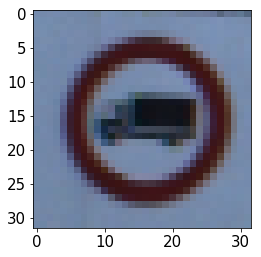

In [62]:
x = 0
pred = np.argmax((model.predict(X_test[x:x+1])))
print("Predicted label is "+str(pred)," Actual label is ",str(np.argmax(y_test[x])))
plt.imshow(X_test_ori[x])

Predicted label is 4  Actual label is  4


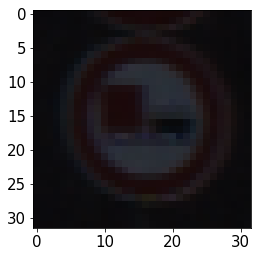

In [64]:
x = 5623
pred = np.argmax((model.predict(X_test[x:x+1])))
print("Predicted label is "+str(pred)," Actual label is ",str(np.argmax(y_test[x])))
plt.imshow(X_test_ori[x])

Predicted label is 37  Actual label is  37


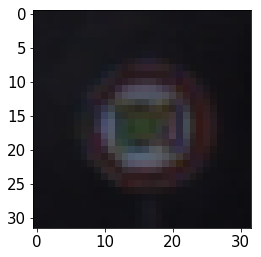

In [65]:
x = 7846
pred = np.argmax((model.predict(X_test[x:x+1])))
print("Predicted label is "+str(pred)," Actual label is ",str(np.argmax(y_test[x])))
plt.imshow(X_test_ori[x])

End of code

In [25]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from matplotlib.ticker import MaxNLocator


In [26]:
# font = {'family' : 'sans-serif',
#         'weight' : 'normal',
#         'size'   : 15}

# train_acc1 = np.array([99.29,99.77,99.73])
# test_acc1 = np.array([90.48,93.33,94.11])
# num_of_hidden_layers = np.array([1,2,3])
# plt.rc('font', **font)
# plt.figure()
# _,ax = plt.subplots()
# ax.set_title('Hyper paramter search CNN')
# ax.set_xlabel("Number of CONV layers")
# ax.set_ylabel('Accuracy')
# plt.plot(num_of_hidden_layers,train_acc1,'o-',label="Train accuracy")
# plt.plot(num_of_hidden_layers,test_acc1,'*-',label="Test accuracy")
# plt.text(num_of_hidden_layers[0],train_acc1[0]-0.8,str(train_acc1[0]))
# plt.text(num_of_hidden_layers[1],train_acc1[1]-0.8,str(train_acc1[1]))
# plt.text(num_of_hidden_layers[2]-0.2,train_acc1[2]-0.8,str(train_acc1[2]))
# plt.text(num_of_hidden_layers[0],test_acc1[0]+0.8,str(test_acc1[0]))
# plt.text(num_of_hidden_layers[1],test_acc1[1]+0.8,str(test_acc1[1]))
# plt.text(num_of_hidden_layers[2]-0.2,test_acc1[2]+0.8,str(test_acc1[2]))
# ax.legend(loc="lower right")
# plt.grid(True)
# fig = plt.gcf()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# # fig.set_size_inches(15, 10, forward=True)

In [27]:
# font = {'family' : 'sans-serif',
#         'weight' : 'normal',
#         'size'   : 15}

# train_acc1 = np.array([99.27,99.56,99.09])
# test_acc1 = np.array([92.45,95.02,93.69])
# num_of_hidden_layers = np.array([32,64,128])
# plt.rc('font', **font)
# plt.figure()
# _,ax = plt.subplots()
# ax.set_title('Hyper paramter search CNN')
# ax.set_xlabel("Number of filters")
# ax.set_ylabel('Accuracy')
# plt.plot(num_of_hidden_layers,train_acc1,'o-',label="Train accuracy")
# plt.plot(num_of_hidden_layers,test_acc1,'*-',label="Test accuracy")
# plt.text(num_of_hidden_layers[0],train_acc1[0]-0.8,str(train_acc1[0]))
# plt.text(num_of_hidden_layers[1],train_acc1[1]-0.8,str(train_acc1[1]))
# plt.text(num_of_hidden_layers[2]-10,train_acc1[2]-0.8,str(train_acc1[2]))
# plt.text(num_of_hidden_layers[0],test_acc1[0]+0.8,str(test_acc1[0]))
# plt.text(num_of_hidden_layers[1],test_acc1[1]+0.8,str(test_acc1[1]))
# plt.text(num_of_hidden_layers[2]-10,test_acc1[2]-0.8,str(test_acc1[2]))
# ax.legend(loc="center right")
# plt.grid(True)
# fig = plt.gcf()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# # fig.set_size_inches(15, 10, forward=True)

stop code